In [2]:
## Load the neccesary packages and the ensembl name archive
library(biomaRt)
library(Rtsne)
library(fpc) 
listMarts(host="www.ensembl.org")
ensembl = useMart(biomart = "ENSEMBL_MART_ENSEMBL",
                  dataset="mmusculus_gene_ensembl",
                  host = "oct2016.archive.ensembl.org")

biomart,version
ENSEMBL_MART_ENSEMBL,Ensembl Genes 88
ENSEMBL_MART_MOUSE,Mouse strains 88
ENSEMBL_MART_SNP,Ensembl Variation 88
ENSEMBL_MART_FUNCGEN,Ensembl Regulation 88
ENSEMBL_MART_VEGA,Vega


In [7]:
cd <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/highly_variant_genes_all_417.csv', header =T)
head(cd)

ensembl_gene_id,meanNormCount,P2272_1004,P2272_1005,P2272_1006,P2272_1009,P2272_1010,P2272_1012,P2272_1013,P2272_1014,⋯,P7657_1181,P7657_1182,P7657_1184,P7657_1185,P7657_1186,P7657_1187,P7657_1188,P7657_1190,P7657_1191,P7657_1192
ENSMUSG00000000001,120.224183,0.0000000,0.6842291,9.6277601,0.2338652,0.000000,0.000000,0.000000,0.4840486,⋯,0.00000,0.000000,7.418372,0.0000000,0.00000,0.00000,1.099338,7.092704,0.00000,0.000000
ENSMUSG00000000031,413.967552,0.0000000,0.3823038,0.2446205,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000
ENSMUSG00000000056,33.739029,0.3374374,5.2136259,0.0000000,3.5309297,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,0.000000,0.8570245,0.00000,0.00000,7.592088,0.000000,0.00000,0.000000
ENSMUSG00000000058,100.081963,0.3374374,0.0000000,0.0000000,6.7239529,2.275288,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,9.136075,0.0000000,0.00000,0.00000,0.000000,0.000000,10.01324,8.492850
ENSMUSG00000000078,2210.421383,12.4018545,2.4728317,10.2844352,11.3578432,3.333222,3.732372,2.807135,8.4172492,⋯,13.05936,4.414935,4.560177,11.3359410,11.00922,10.76684,7.998825,11.794868,11.43066,7.829718
ENSMUSG00000000093,3.723828,0.0000000,0.0000000,0.0000000,0.0000000,0.000000,0.000000,0.000000,0.0000000,⋯,0.00000,0.000000,2.589828,0.0000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000


In [8]:
meta <- read.csv('/home/rstudio/SingleCellProject/R_wdir/Final_data/metadata_all_filtered_final_417.csv',row.names=1)

In [9]:
genes <- cd$ensembl_gene_id
gene.list <- getBM(filters= "ensembl_gene_id",
                   attributes= c("ensembl_gene_id",
                                 "external_gene_name"),values=genes,mart= ensembl)
                   
gene.name <- merge(cd,gene.list, by = "ensembl_gene_id")
mat <- gene.name
                   
rownames(mat) <- mat[,420]
mat <- mat[,-420]
mat <- mat[,-1]
mat <- mat[,-1]

In [10]:
base.pca <- prcomp(t(mat))
tail=as.vector(apply(base.pca$rotation[,1:5],2,function(x) tail(names(sort(x)),n=50)))
head=as.vector(apply(base.pca$rotation[,1:5],2,function(x) head(names(sort(x)),n=50)))
top.load.genes = unique(c(head,tail))
top.load.genes <- as.data.frame(top.load.genes)
                   
colnames(top.load.genes) <- 'external_gene_name'
top.500 <- merge(top.load.genes,gene.name,by='external_gene_name')
                   
rownames(top.500) <- top.500[,1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]
top.500 <- top.500[,-1]

In [14]:
## Euclidean distances analysis between variables

d <- dist(t(top.500), method="euclidean")

cluster.best <-7

cboot.clust <- clusterboot(t(top.500),clustermethod=hclustCBI,
                            method="ward.D2", k=cluster.best)

fit <- cboot.clust$result$result

groups<-cboot.clust$result$partition 
meta$clusterboot2 <- groups

cluster.stability <- cboot.clust$bootmean

numbers.dissolved <- cboot.clust$bootbrd 



boot 1 
boot 2 
boot 3 
boot 4 
boot 5 
boot 6 
boot 7 
boot 8 
boot 9 
boot 10 
boot 11 
boot 12 
boot 13 
boot 14 
boot 15 
boot 16 
boot 17 
boot 18 
boot 19 
boot 20 
boot 21 
boot 22 
boot 23 
boot 24 
boot 25 
boot 26 
boot 27 
boot 28 
boot 29 
boot 30 
boot 31 
boot 32 
boot 33 
boot 34 
boot 35 
boot 36 
boot 37 
boot 38 
boot 39 
boot 40 
boot 41 
boot 42 
boot 43 
boot 44 
boot 45 
boot 46 
boot 47 
boot 48 
boot 49 
boot 50 
boot 51 
boot 52 
boot 53 
boot 54 
boot 55 
boot 56 
boot 57 
boot 58 
boot 59 
boot 60 
boot 61 
boot 62 
boot 63 
boot 64 
boot 65 
boot 66 
boot 67 
boot 68 
boot 69 
boot 70 
boot 71 
boot 72 
boot 73 
boot 74 
boot 75 
boot 76 
boot 77 
boot 78 
boot 79 
boot 80 
boot 81 
boot 82 
boot 83 
boot 84 
boot 85 
boot 86 
boot 87 
boot 88 
boot 89 
boot 90 
boot 91 
boot 92 
boot 93 
boot 94 
boot 95 
boot 96 
boot 97 
boot 98 
boot 99 
boot 100 


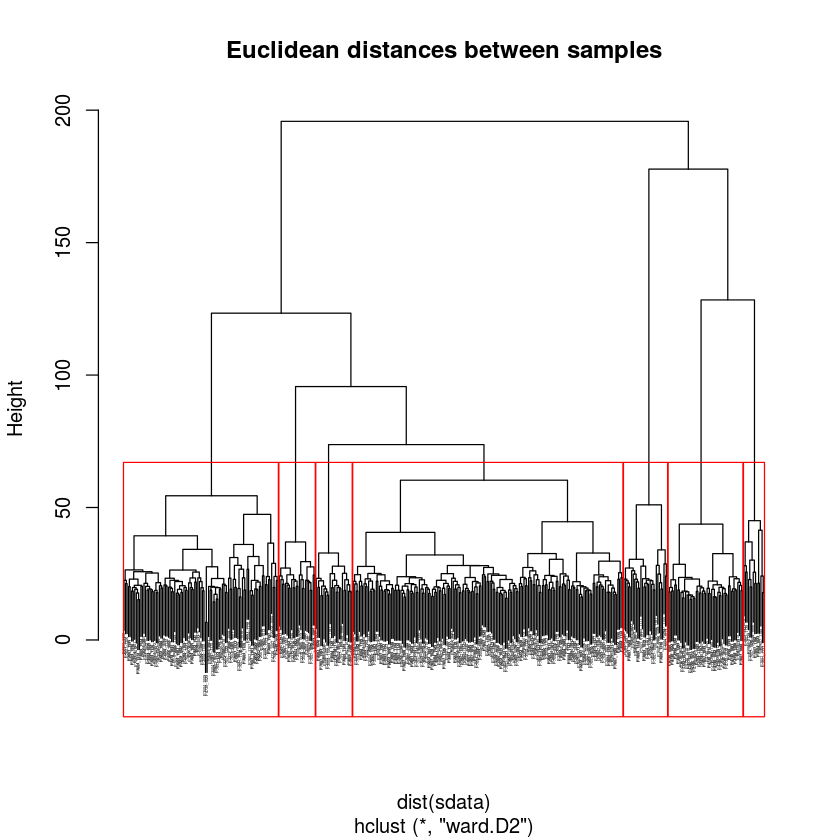

In [15]:
plot(fit,cex=0.2,main='Euclidean distances between samples')
rect.hclust(fit, k=7)

In [16]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.1 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] fpc_2.1-10     Rtsne_0.11     biomaRt_2.30.0

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.10         DEoptimR_1.0-8       class_7.3-14        
 [4] prabclus_2.2-6       bitops_1.0-6         tools_3.3.1         
 [7] digest_0.6.12        uuid_0.1-2           mclust_5.2.3        
[10] jsonlite_1.3         RSQLite_1.1-2        evaluate_0.10       
[13] memoise_1.0.0        lattice_0.20-35    